# Python Visualization for Exploration of Data
## Stephen Elston and Ronald Lopez
## Presented at PyData San Francisco, August 2016  

In these lessons we will be working with a data set containing the prices and characteristics of a number of automobiles. The ultimate goal is to build a model for predicting the price of a car from its characteristics. However, in this lesson we will focus on data exploration using visualization techniques. 

## About this Jupyter Notebook
This notebook contains material to help you learn how to expore data visually. This notebook and the data set can be downloaded from 

This notebook was constructed using using the Anconda 3.5 Python distribution. If you are not running version Anaconda 3.5 or higher we suggest you update your Anaconda distribution now.  You can download the Python 3 Anaconda distribution for your operating system from the [Continum Analytics web site](https://www.continuum.io/downloads)

## About Us

These lessons have been prepared by:

**Steve Elston**

- Co-founder and principle consultant Quantia Analytics, LLC 
- Instructor, University of Washington data science program
- Decades of experience in predictive analytics and machine learning
- Long term Python and R (S/SPLUS) user and developer 
- Azure ML advisor to Microsoft
- Experience in several industries: payment, telecom, capital markets, logistics
- PhD in Geophysics from Princeton University


**Ronald Lopez**

## Why visualize

Visualization is an essential method in any data scientist’s toolbox. Visualization is a key first step in the exploration of most data sets. As a general rule, you should never start creating models until you have examined the data and understand the relationships. Otherwise, you risk wasting your time creating models blindly. Visualization is also a powerful tool for presentation of results and for determining sources of problems with analytics. 

The concepts ofexploring a data set visually were pioniered by John Tukey in the 1960s and 1970s. Tukey published his pioneering book in the late 1970s, *John Tukey, Exploratory Data Analysis, 1977, Addison-Westley*.

The key concept of exploratory data analysis (EDA) or visual exploration of data is to understand the relatiships in the data set. Specifically using visualization when you appraoch a new data set you can:

- Explore complex data sets, using visualization to develop understanding of the inherent relationships.
- Use different chart types to create multiple views of data to highlight different aspects of the inherent relationships.
- Use plot aesthetics to project multiple dimensions. 
- Apply conditioning or faceting methods to project multiple dimensions



These lessons are divided into three parts. In each part you will learn how to use the visualization tools availble in Python.

- **Overview of plot types** is a reivew of creating basic plot types used to construct visualizations.
- **Using Asthetics** is an overview of how to project additional plot dimensions using plot asthetics.
- **Conditioned plotting** also know as faceted plotting introduces a powerful method for visualizing higher dimensional data. 

In the exercises, you will use both pandas plotting and the seaborn package. We assume you have at least a bit of experience using pandas and Jupyter notebooks.  



## Load and examine the data set

Let's get started. The function shown in the cell below loads the data from the .csv file. Some minimal clean up is performed on the data. Rows with missing values are dropped and some columns are converted from strings containing numbers to numeric data. 

Execute the code in this cell to load the data into your notebook. **Make sure you have the .csv file in your working directory!**

In [1]:
def read_auto_data(fileName = "Automobile price data.csv"):
    'Function to load the auto price data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    auto_prices = pd.read_csv(fileName)
    
    ## Remove rows with missing values
    auto_prices.dropna(axis = 0, inplace = True)
#    auto_prices = auto_prices[pd.notnull(auto_prices)]


    ## Convert some columns to numeric values
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    auto_prices[cols] = auto_prices[cols].convert_objects(convert_numeric=True)
#    auto_prices[cols] = auto_prices[cols].to_numeric()

#    auto_prices = auto_prices[np.isfinite(auto_prices[cols])]

    return auto_prices
auto_prices = read_auto_data()

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Using the pandas head method let's have a first look at the columns in this data set. 

In [2]:
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


You can see there are both numerical and string (categorical) variable types. As a next step examine some summary statistics of the numeric columns using the pandas describe method. Note that units of measurement are American not Metric.  

In [3]:
auto_prices.describe()

C:\Users\Steve\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Basic chart types

Now that we have loaded and had a first look at the data, let's get to work making some charts. 

There are enumerable chart types which have been created and used for data exploration. In this tutorial we will focus on the most used chart types:

- **Scatter plot**
- **Line plots**
- **Bar plots**
- **Histograms**
- **Box plots**
- **Violin plots**

### Scatter plots

Scatter plots show the relationship be two variables in the form of dots on the plot. In simple terms the values along a horizontal axis are plotted against a vertical axis. 

The pandas package contains a number of useful plot methods which operate on data frames. The simple recipe for plotting from pandas data frames is:

- Use the plot method, specifing the ``kind`` argument, or ise a chart-specific plot method.
- Specify the columns with the values for the ``x`` and ``y`` axes. 

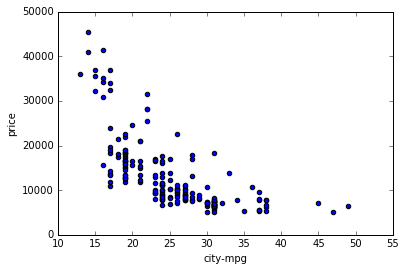

In [4]:
%matplotlib inline 
auto_prices.plot(kind = 'scatter', x = 'city-mpg', y = 'price')

Our basic recipe worked, but it does not give us much control over the result. 

We can take advantage of the fact that pandas plot methods are built on matplotlib. Thus, we can specify a figure and one or more axes within that figure. We can control many plot attributes once we have specified the axes. Our improved recipe looks like this:

- Specify a figure, including a size.
- Define one or more axis within the figure.
- Use the pandas plot method of choice. Make sure you specify the asis you are using. 
- Use methods on the axes to control attributes like titles and axis labels. 

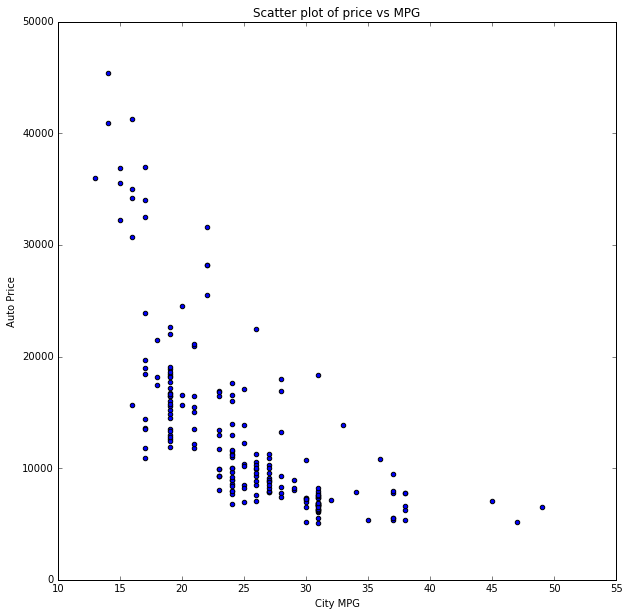

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis                   
auto_prices.plot(kind = 'scatter', x = 'city-mpg', y = 'price', ax = ax)
ax.set_title('Scatter plot of price vs MPG') # Give the plot a main title
ax.set_xlabel('City MPG') # Set text for the x axis
ax.set_ylabel('Auto Price')# Set text for y axis

### Line plots

Line plots are similar to point plots. In line plots the discrete points are connected by lines.

First, we will create a dataframe, with a simple relationship between x and y.

In [6]:
import pandas as pd
x = list(range(100))
y = [x * x for x in range(100)]
df = pd.DataFrame({'x':x, 'y':y})

Now, apply the pervious recipe to plot x vs y as a line chart.

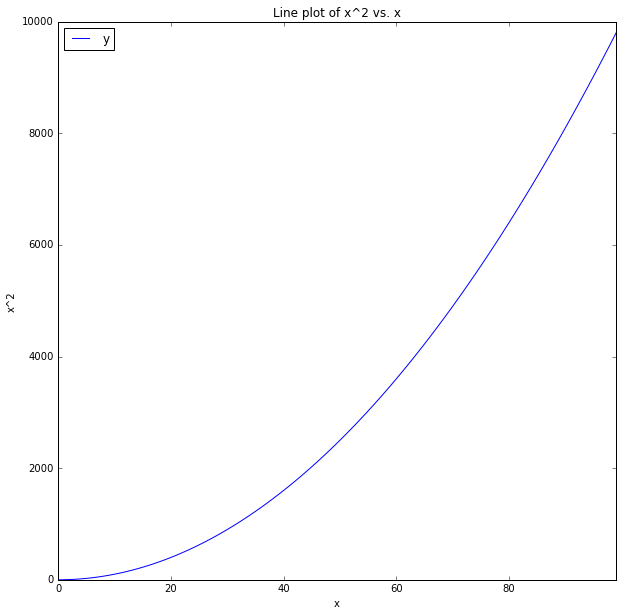

In [7]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis                   
df.plot(x = 'x', y = 'y', ax = ax)
ax.set_title('Line plot of x^2 vs. x') # Give the plot a main title
ax.set_xlabel('x') # Set text for the x axis
ax.set_ylabel('x^2')# Set text for y axis

### Bar plots

Bar plots are used to display the counts of unique values in a catgorical variable. The height of the bar represents of the count for each unique category. 

The first step in making a bar plot is to compute the counts. The code in the cell below creates a pandas data frame with the counts and the names of the categories as the index, using the pandas ``value_counts`` method.

In [8]:
make_counts = auto_prices['make'].value_counts() # find the counts for each unique category
make_counts

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
alfa-romero       3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64

You can see the ordered list of counts by make above. 

Now, make the bar plot using the ``make_counts`` data frame, create the bar plot of number of autos by make.

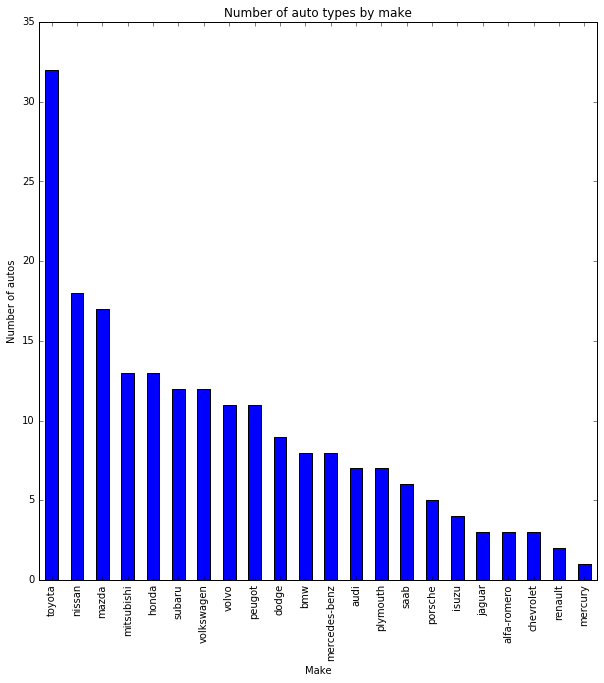

In [9]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
make_counts.plot.bar(ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Number of auto types by make') # Give the plot a main title
ax.set_xlabel('Make') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

### Histograms

Histograms are related to bar plots. Histograms are used for numberic variables. Whereas, a bar plot shows the counts of unique categories, a histogram shows the number of data with values within a bin. The bins divide the values of the variable into equal segments. The vertical axis of the histogram shows the number of data values within each bin.  

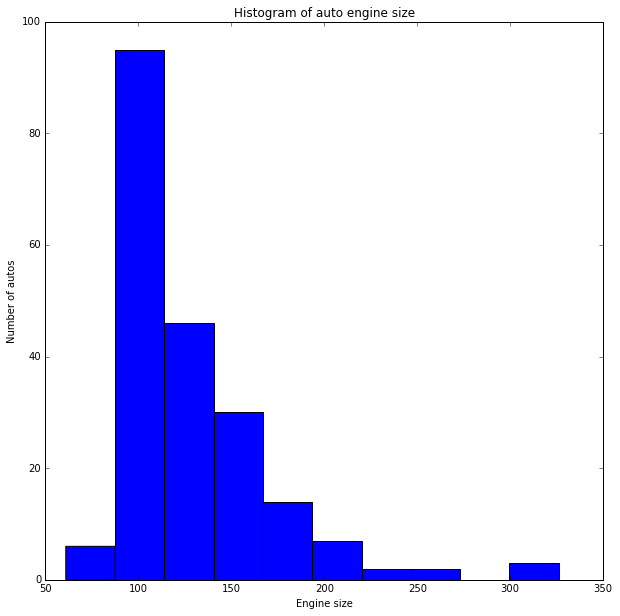

In [10]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
auto_prices['engine-size'].plot.hist(ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Histogram of auto engine size') # Give the plot a main title
ax.set_xlabel('Engine size') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

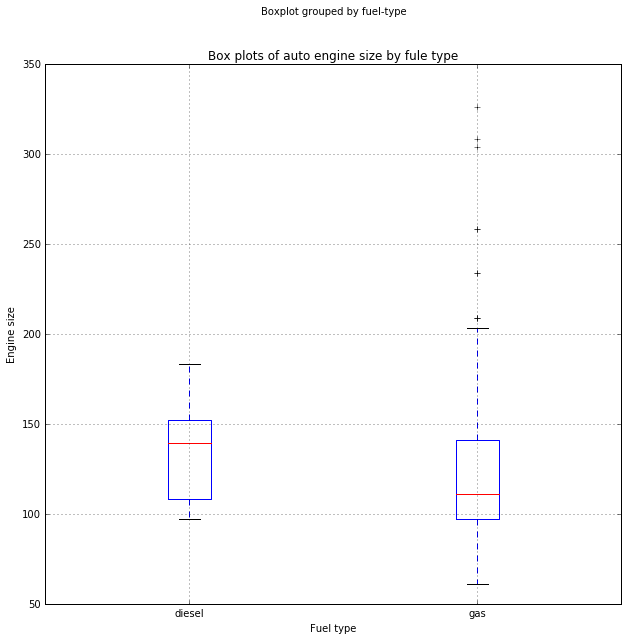

In [11]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
auto_prices[['engine-size','fuel-type']].boxplot(by = 'fuel-type', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of auto engine size by fule type') # Give the plot a main title
ax.set_xlabel('Fuel type') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

#### Violine plots and introduction to seaborn

``pip install seaborn``



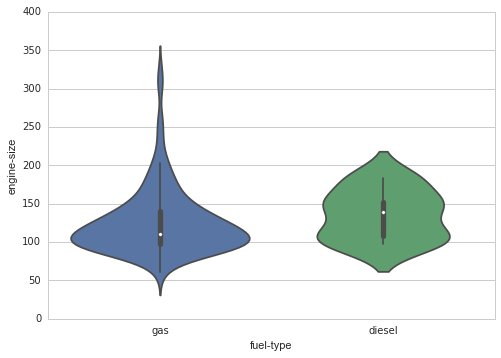

In [12]:
import seaborn as sns
sns.set_style("whitegrid")
sns.violinplot(data = auto_prices, x = 'fuel-type', y = 'engine-size')

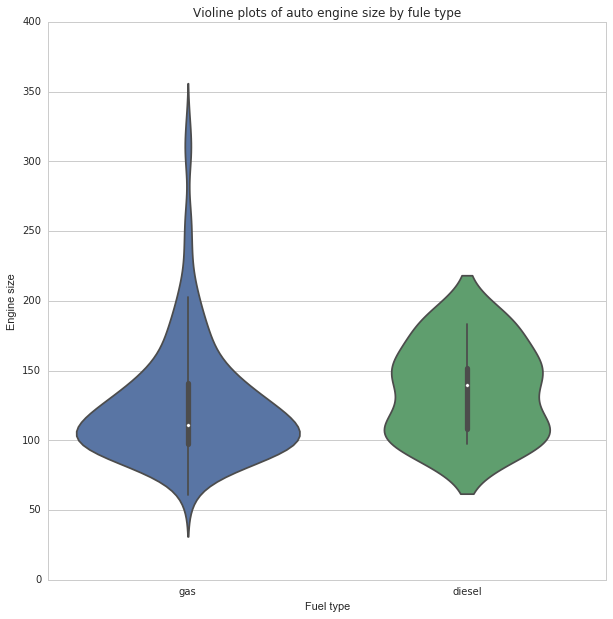

In [13]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'fuel-type', y = 'engine-size', data = auto_prices, ax = ax)
ax.set_title('Violine plots of auto engine size by fule type') # Give the plot a main title
ax.set_xlabel('Fuel type') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

### Kernel density plot

C:\Users\Steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


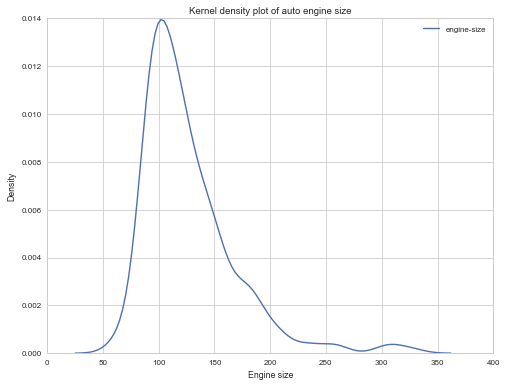

In [189]:
fig = plt.figure(figsize=(8,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(auto_prices['engine-size'], ax = ax)
ax.set_title('Kernel density plot of auto engine size') # Give the plot a main title
ax.set_xlabel('Engine size') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

## Viewing multiple dimensions with asthetics

We have now explored some basic plot types. Now, we will use asthetics to view additional dimensions of the data set. There are many possible asthetics one can use for visualization. Some specific examples include:

- Color
- Transparency
- Size
- Marker shape
- Aesthetics specific to plot type

Using asthetics you can project additional dimensions onto a two dimensional display. With a bit of cleverness, this can lead to interresting insights about a data set. But don't over do it! To many colors, shapes and sizes can be confusing, obfuscating rather than enlightening. 

### Color

Color can be used to view an additional dimension on a scatter plot. A categorical factor can be show using different colors for the different categories. 

**Caution!** Make sure you use choose a pallet with distinctive colors for each cateogry. Invariably too many categories using similar colors are hard to see and imposible to interpret. 



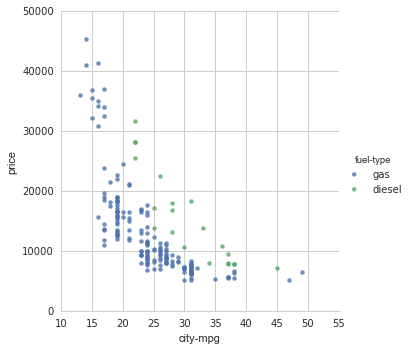

In [20]:
sns.lmplot(x = 'city-mpg', y = 'price', data = auto_prices, hue = "fuel-type", fit_reg = False)     

['city-mpg']

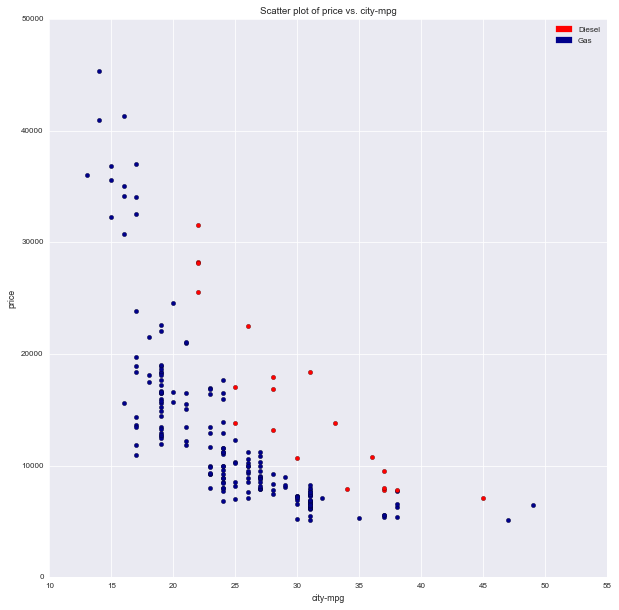

In [51]:
def auto_color(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue')                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red') 
    ax.set_title('Scatter plot of price vs. ' + col)
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return plot_cols
auto_color(auto_prices, ['city-mpg'])

### Transparency

['city-mpg']

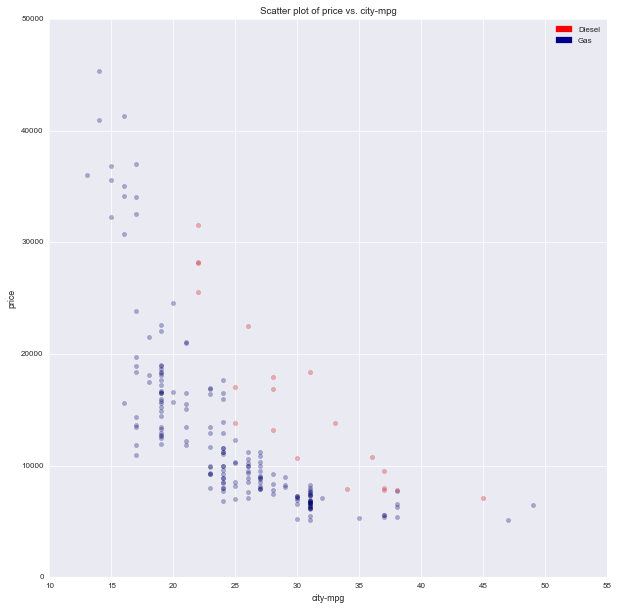

In [118]:
def auto_color(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', alpha = 0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red', alpha = 0.3) 
    ax.set_title('Scatter plot of price vs. ' + col)
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return plot_cols
auto_color(auto_prices, ['city-mpg'])

### Using marker size

['city-mpg']

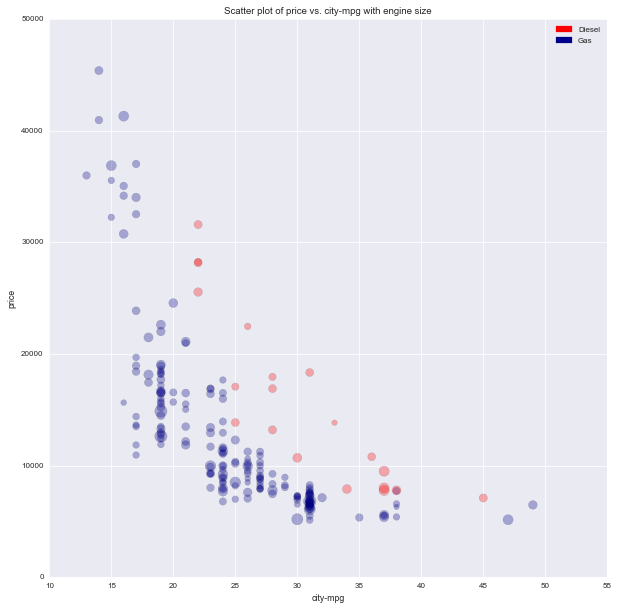

In [99]:

def auto_size(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', s= .5 * auto_prices['engine-size'], alpha = 0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red', s= .5 * auto_prices['engine-size'], alpha = 0.3) 
    ax.set_title('Scatter plot of price vs. ' + col + ' with engine size')
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return plot_cols
auto_size(auto_prices, ['city-mpg'])    

'Done'

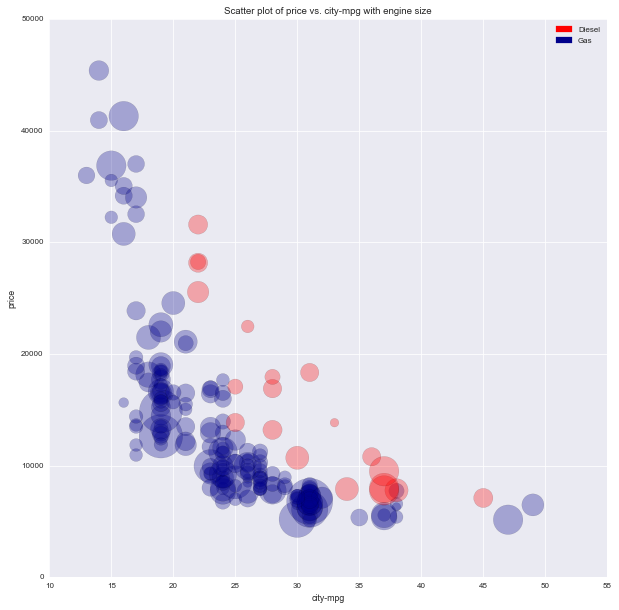

In [112]:

def auto_size_2(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', s= .02 * auto_prices['engine-size'] * auto_prices['engine-size'], 
                       alpha = 0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red', s= .02 * auto_prices['engine-size']  * auto_prices['engine-size'], 
                       alpha = 0.3) 
    ax.set_title('Scatter plot of price vs. ' + col + ' with engine size')
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return 'Done'
auto_size_2(auto_prices, ['city-mpg']) 

### Using marker shapes

'Done'

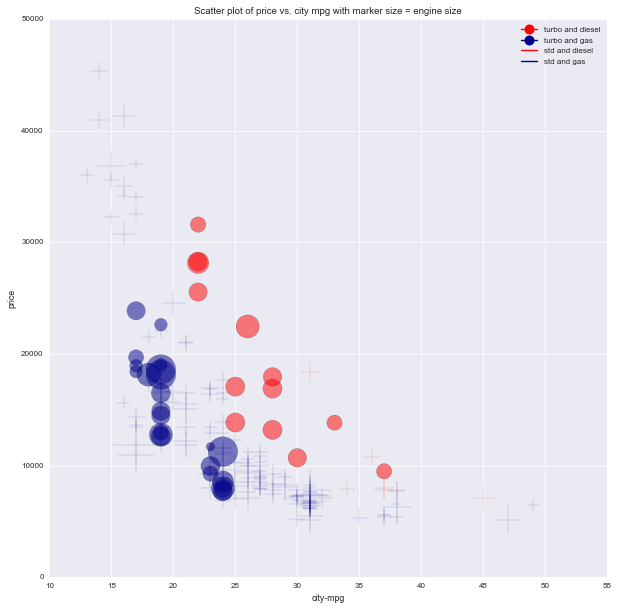

In [117]:
def auto_shape(df):
    import matplotlib.pyplot as plt
    import matplotlib.lines as mlines
    aspiration = ['turbo', 'turbo', 'std', 'std']
    fuel = ['diesel', 'gas', 'diesel', 'gas']
    mrks = ['o', 'o', '+', '+']
    cols = ['Red', 'DarkBlue', 'Red', 'DarkBlue']
    ldg = []
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    for asp, fl, mk, cl in zip(aspiration, fuel, mrks, cols):
        temp = df.ix[(df['aspiration'] == asp) & (df['fuel-type'] == fl)]       
        if temp.shape[0] > 0:                    
            temp.plot(kind = 'scatter', x = 'city-mpg', y = 'price' , ax = ax, color = cl, marker = mk,
                       s= .02 * df['engine-size'] * df['engine-size'], alpha = 0.5)    
        ldg.append(mlines.Line2D([], [], color=cl, marker=mk, markersize=10, 
                                 label=(asp + ' and ' + fl)))    
    ax.set_title('Scatter plot of price vs. city mpg with marker size = engine size')
    plt.legend(handles=ldg)
    return'Done'
auto_shape(auto_prices)

### Plot specific asthetics - Histogram bins

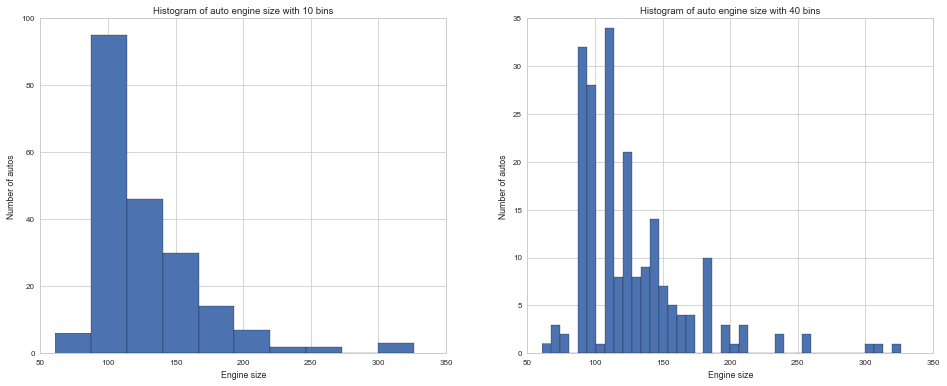

In [133]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
auto_prices['engine-size'].plot.hist(ax = ax[0]) 
ax[0].set_title('Histogram of auto engine size with 10 bins') # Give the plot a main title
ax[0].set_xlabel('Engine size') # Set text for the x axis
ax[0].set_ylabel('Number of autos')# Set text for y axis
auto_prices['engine-size'].plot.hist(ax = ax[1], bins = 40) 
ax[1].set_title('Histogram of auto engine size with 40 bins') 
ax[1].set_xlabel('Engine size') 
ax[1].set_ylabel('Number of autos')

### Plot specific asthetics - Split violine plot

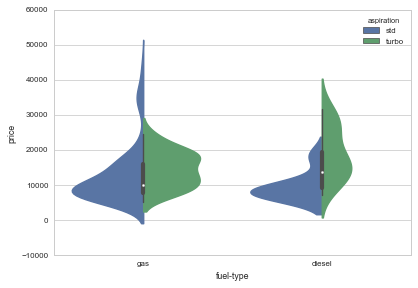

In [132]:
import seaborn as sns
sns.set_style("whitegrid")
sns.violinplot(data = auto_prices, x = 'fuel-type', y = 'price', hue="aspiration",  split=True)

### Plot specific asthetics - Box plots

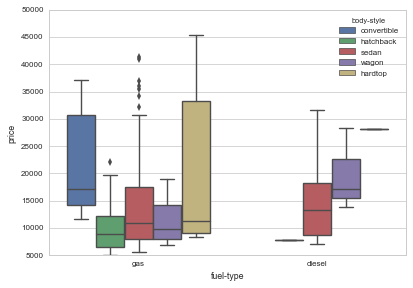

In [131]:
sns.set_style("whitegrid")
sns.boxplot(data = auto_prices, x = 'fuel-type', y = 'price', hue="body-style")

## Multi-axis and Facet Plots

We have explored basic plot types and using asthetics to project multiple dimenstions onto basic plot types. Now we will investige the use multiple plot axes and of a technique known as faceting.  

- Pair plots with marginal density
- Pairwise scatter plots
- Multi-asis plots
- Faceted plots

Faceting involves using values of categorical or numeric variables to create a systematic grid of related plots. 

### Pair plot with marginal density

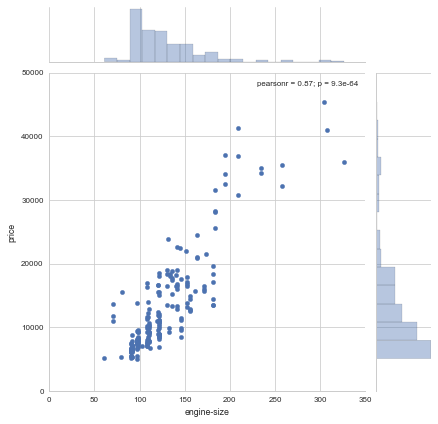

In [196]:
sns.set_style("whitegrid")
sns.jointplot('engine-size', 'price', data = auto_prices)

### Pair wise scatter plots

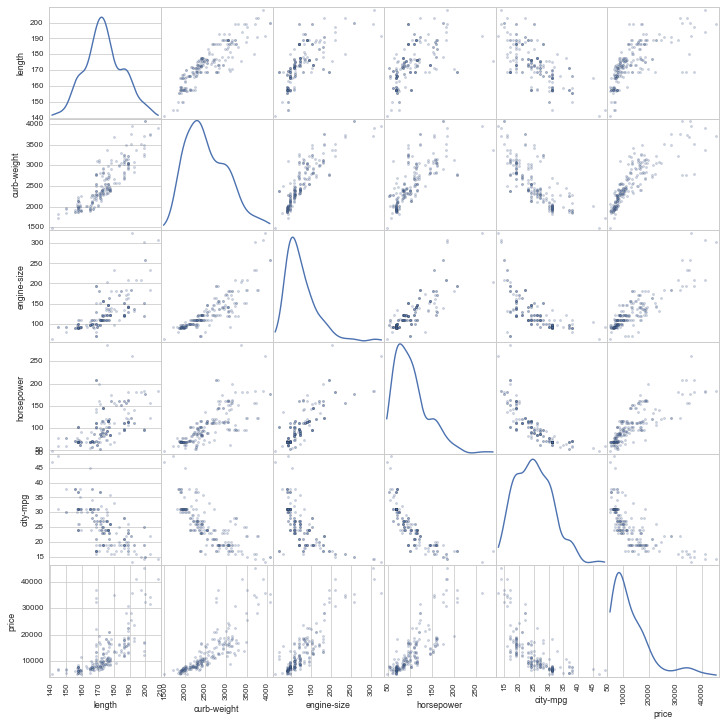

In [146]:
from pandas.tools.plotting import scatter_matrix
num_cols = ["length", "curb-weight", "engine-size", "horsepower", "city-mpg", "price"] 
temp = scatter_matrix(auto_prices[num_cols], alpha=0.3, diagonal='kde', s = 20, figsize=(12,12))

C:\Users\Steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


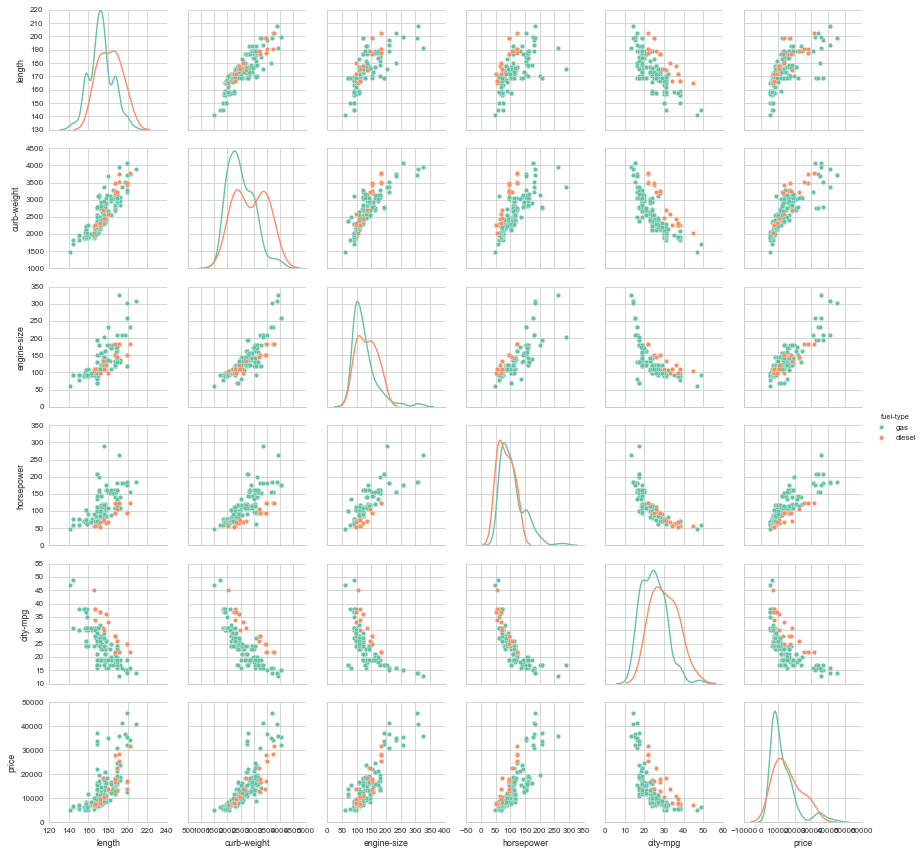

In [148]:
num_cols = ["length", "curb-weight", "engine-size", "horsepower", "city-mpg", "price", "fuel-type"] 
sns.pairplot(auto_prices[num_cols], hue='fuel-type', palette="Set2", diag_kind="kde", size=2)

### Multi-axis plots

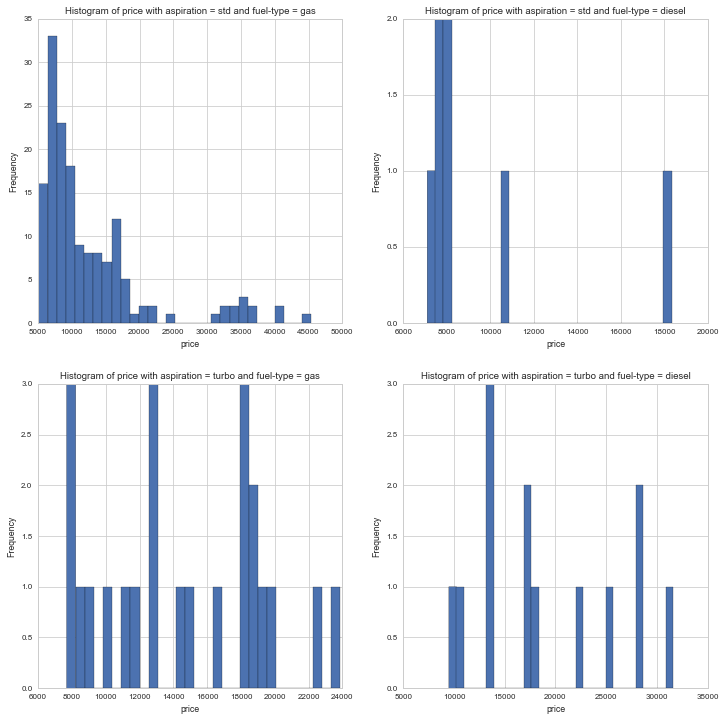

In [159]:
def plot_multi(df, col, xcol, ycol):
    fig, ax = plt.subplots(2, 2, figsize = (12, 12))
    xcols = df[xcol].unique()
    ycols = df[ycol].unique()
    for i, xcl in enumerate(xcols):
        for j, ycl in enumerate(ycols):
            auto_prices.ix[(df[xcol] == xcl) & (df[ycol] == ycl), col].plot.hist(ax = ax[i,j], bins = 30)
            ax[i,j].set_title('Histogram of ' + col + ' with ' + xcol + ' = ' + xcl + ' and ' + ycol + ' = ' + ycl) 
            ax[i,j].set_xlabel(col) 
plot_multi(auto_prices, 'price', 'aspiration', 'fuel-type')            

### Facet plots

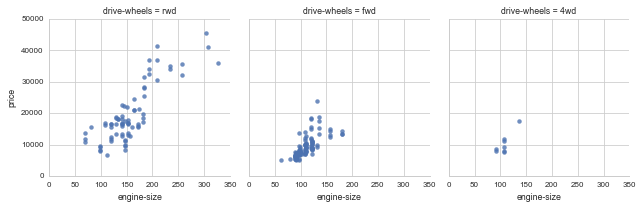

In [184]:
g = sns.FacetGrid(auto_prices, col="drive-wheels")
g.map(sns.regplot, "engine-size", "price", fit_reg = False)

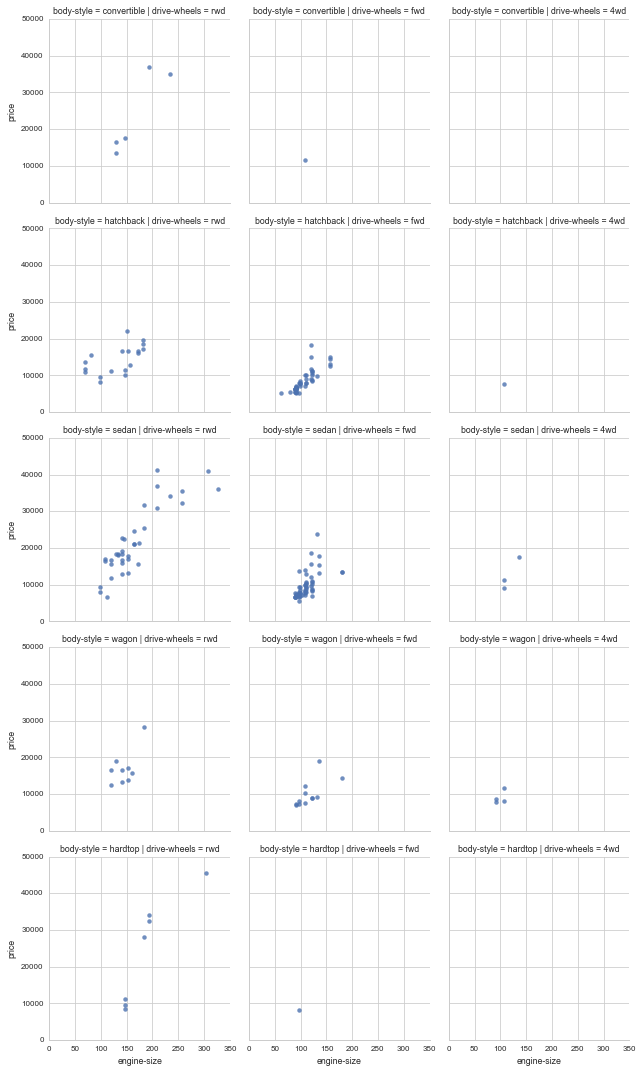

In [164]:
g = sns.FacetGrid(auto_prices, col="drive-wheels", row = 'body-style')
g.map(sns.regplot, "engine-size", "price", fit_reg = False)

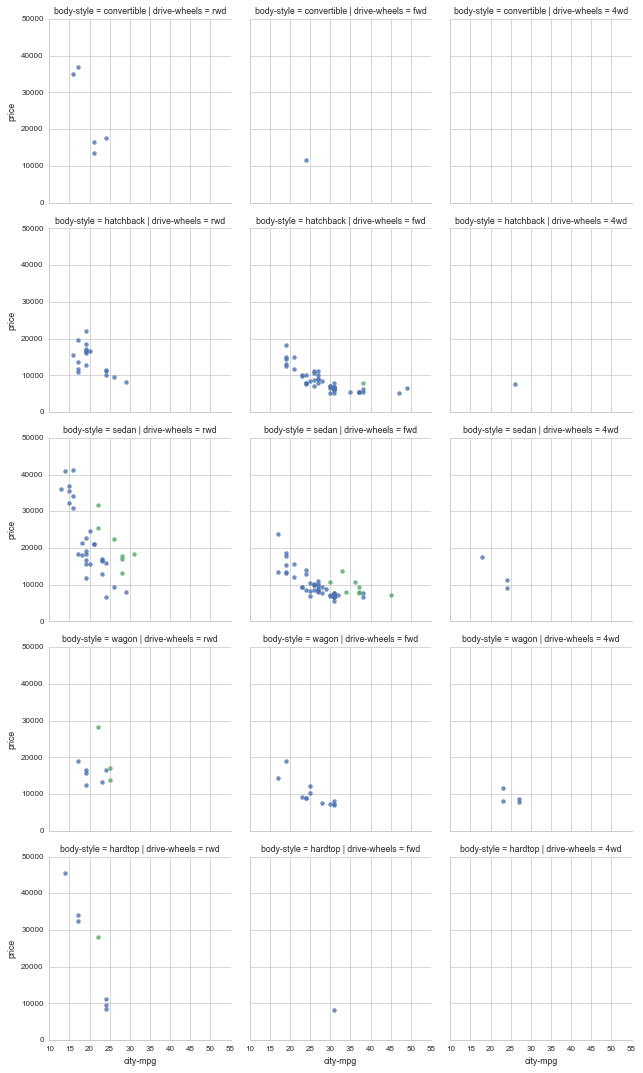

In [177]:
g = sns.FacetGrid(auto_prices, col="drive-wheels", row = 'body-style', hue = 'fuel-type')
g.map(sns.regplot, 'city-mpg', 'price', fit_reg = False)

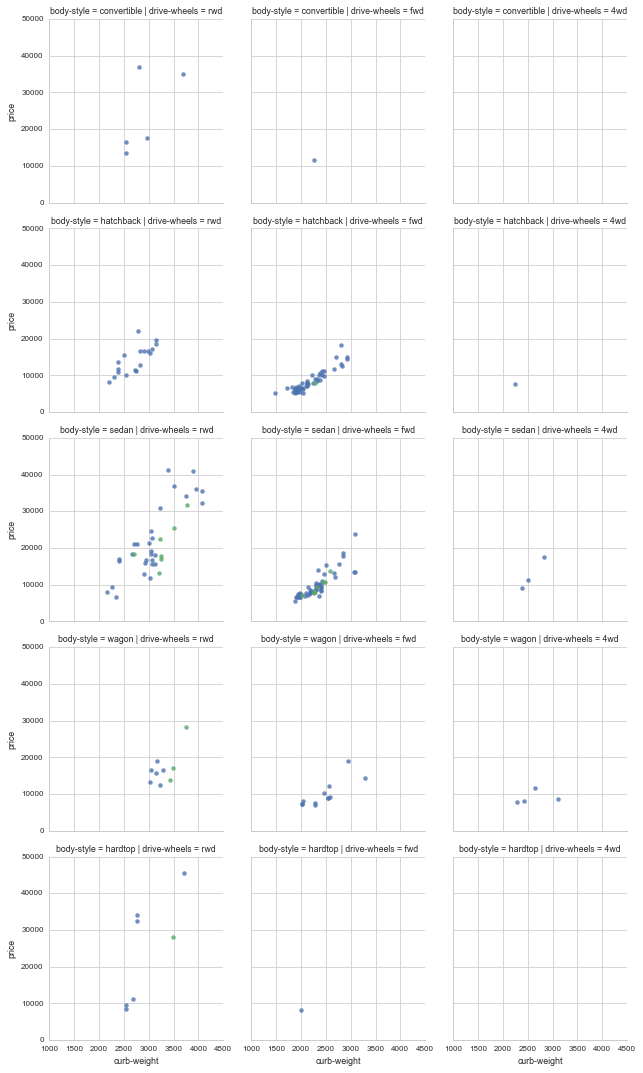

In [186]:
g = sns.FacetGrid(auto_prices, col="drive-wheels", row = 'body-style', hue = 'fuel-type')
g.map(sns.regplot, 'curb-weight', 'price', fit_reg = False)